In [26]:
#bibliotecas
import tweepy
import json
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#variaveis e keys
tweet_text = []
twitter_keys = {
	'consumer_key': 'your Key',
	'consumer_secret': 'your Key',
	'access_token_key': 'your Key,
	'access_token_secret': 'your Key'
    }

#configura acesso a API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

api = tweepy.API(auth)

search_words = "#flamengo #atletico #copadobrasil" + "-filter:retweets"
public_tweets = tweepy.Cursor(api.search,
                q=search_words).items(500)

#capturando somente dados que vao ser usados
for tweet in public_tweets:
  tweet_text.append(tweet.text)

#salvando arquivo .json com data e hora do tweet mais antigo persistindo em 100 tweets
tupla_frame = list(zip(tweet_text))
df = pd.DataFrame(tupla_frame, columns=['tweet_text'])

#transfomando todo df em string
string = pd.Series(df['tweet_text'].values).str.cat(sep=' ')

#retirando caracteres indesejaveis
caracter = '#@'

for remove in caracter:
  string = string.replace(remove, "")

#ocultando algumas palavras da nuvem

stopwords = set(STOPWORDS)
stopwords.update(['às','pois', 'em', 'de', 'um', 'uma','na', 'ser','aqui','vou', 'https://t.co', 'por', 'dar','dos', 'do','da', 'das','https',"RT","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

#plotando nuvem
wordcloud = WordCloud(width=1200, stopwords=stopwords,height=800,max_font_size=200,max_words=150,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

,tweet_text
0,Na entrevista pós jogo ontem o Hulck disse que...
1,13/07/2022 - #Flamengo 2 x 0 #Atlético-MG\nCop...
2,Vidal comemorou e muito o gol de Arrascaeta no...
3,#Flamengo #Atletico #CopaDoBrasil https://t.co...
4,@hevertonfutebol Eliminação do #Atlético tem u...


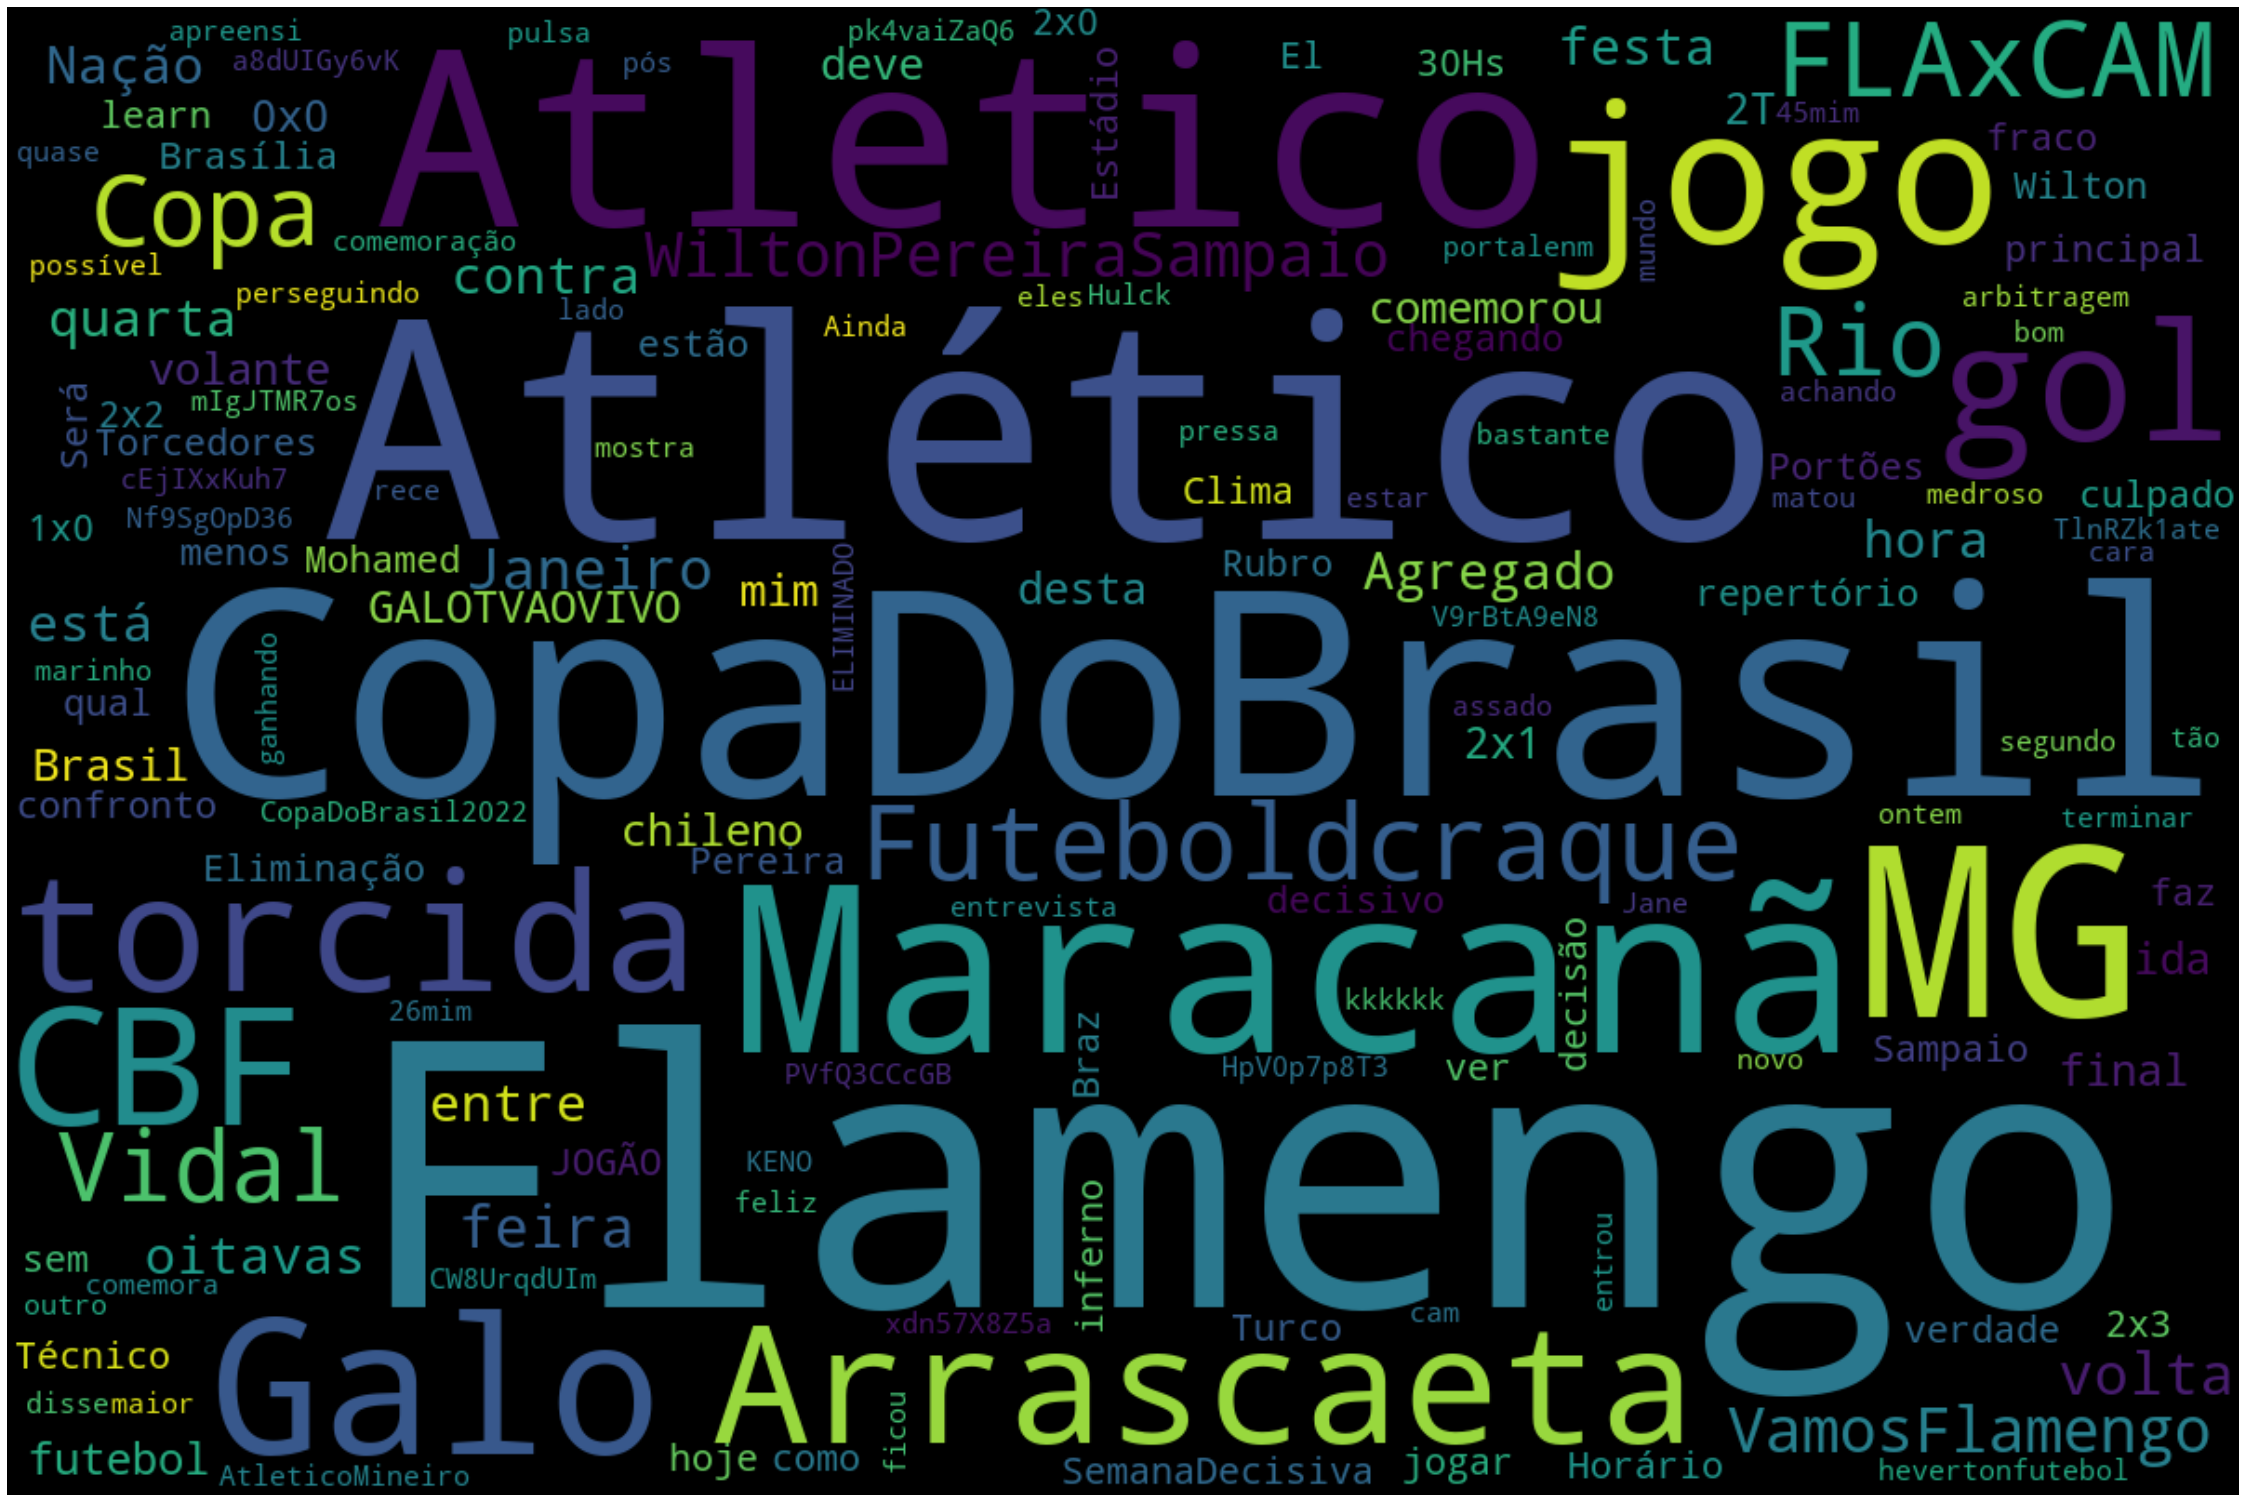